# Introduction

In this small Jupyter notebook I want to show a simple example of how to build up and train a MLP for a simple classification task.

# Check dependencies

In [1]:
import matplotlib
print(matplotlib.__version__)

import numpy as np
print(np.__version__)

import tensorflow as tf
print(tf.__version__)

3.1.3
1.18.1
2.1.0


# Generating some data

The following code will generate a 2D matrix X with a random 2D point (x1,x2) in each row.
The 1D matrix Y contains the desired labels. In Y, the corresponding value for (x1,x2) will be 1 if the point (x1,x2) is within a unit circle with radius 0.5 and 0 else.

In [2]:
import numpy as np
X = np.random.uniform(low=-1.0, high=+1.0, size=(1000,2))

In [3]:
X.shape

(1000, 2)

In [4]:
X[:15]

array([[ 0.83083366,  0.77291635],
       [-0.67090809, -0.29031336],
       [ 0.32880603,  0.58923334],
       [-0.49508055, -0.98186088],
       [-0.96555781,  0.43268534],
       [-0.5084933 ,  0.55422014],
       [-0.92465285, -0.54079113],
       [ 0.28150128, -0.67394564],
       [-0.22657311, -0.10204196],
       [ 0.14188403, -0.10230542],
       [-0.61236994,  0.93374023],
       [-0.19137071,  0.24358752],
       [-0.79422916,  0.11345515],
       [ 0.3326042 , -0.71602676],
       [-0.96749483, -0.94472917]])

In [5]:
# Try both variants!

Y = []
for i in range(0,X.shape[0]):
    
    # variant #1
    #if (X[i,0]**2 + X[i,1]**2) < 0.5:
        
    # variant #2
    if (abs(X[i,0])<0.5) and (abs(X[i,1]) < 0.5):
        Y.append(1.0)
    else:
        Y.append(0.0)
Y = np.array(Y)

In [6]:
Y.shape

(1000,)

In [7]:
Y[:15]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.])

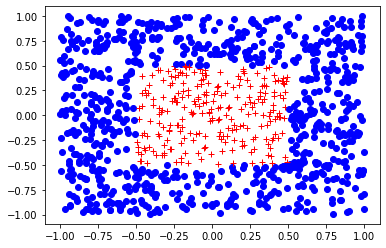

In [8]:
import matplotlib.pyplot as plt

nr_samples = X.shape[0]
for i in range(0,nr_samples):
    if Y[i] == 1:
        plt.plot(X[i,0], X[i,1], 'r+')
    else:
        plt.plot(X[i,0], X[i,1], 'bo')

plt.show()

# Splitting the data into training and test data

In [9]:
X.shape

(1000, 2)

In [10]:
Y.shape

(1000,)

In [11]:
n = 750

X_train = X[0:n,:]
Y_train = Y[0:n]

X_test = X[n:1000,:]
Y_test = Y[n:1000]

In [12]:
X_train.shape

(750, 2)

In [13]:
X_test.shape

(250, 2)

In [14]:
Y_train.shape

(750,)

In [15]:
Y_test.shape

(250,)

# Building a MLP using Keras

Here we generate a MLP.

The MLP is built with the help of the Keras API, which is integrated in TensorFlow since TensorFlow 2.0.

For an overview of Keras, see
https://www.tensorflow.org/guide/keras/overview

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K

K.clear_session()

model = Sequential()
model.add(Dense(4, activation="relu", name="hidden1", input_dim=2))
model.add(Dense(3, activation="relu", name="hidden2"))
model.add(Dense(1, activation="linear", name="output"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden1 (Dense)              (None, 4)                 12        
_________________________________________________________________
hidden2 (Dense)              (None, 3)                 15        
_________________________________________________________________
output (Dense)               (None, 1)                 4         
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


# Training the MLP using the training data

Now we will train the MLP using both the input matrix X and the desired output matrix Y.

In [17]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train,Y_train, epochs=300, verbose=1)

Train on 750 samples
Epoch 1/300
750/750 [==============================] - 0s 526us/sample - loss: 0.2541
Epoch 2/300
750/750 [==============================] - 0s 111us/sample - loss: 0.2324
Epoch 3/300
750/750 [==============================] - 0s 94us/sample - loss: 0.2186
Epoch 4/300
750/750 [==============================] - 0s 160us/sample - loss: 0.2070
Epoch 5/300
750/750 [==============================] - 0s 139us/sample - loss: 0.1925
Epoch 6/300
750/750 [==============================] - 0s 115us/sample - loss: 0.1780
Epoch 7/300
750/750 [==============================] - 0s 133us/sample - loss: 0.1716
Epoch 8/300
750/750 [==============================] - 0s 104us/sample - loss: 0.1680
Epoch 9/300
750/750 [==============================] - 0s 107us/sample - loss: 0.1646
Epoch 10/300
750/750 [==============================] - 0s 95us/sample - loss: 0.1618
Epoch 11/300
750/750 [==============================] - 0s 88us/sample - loss: 0.1590
Epoch 12/300
750/750 [============

# Testing the trained MLP model

We will now use the test samples to test the MLP. Each of these test samples is classified to be in class red or class blue.

In [18]:
preds = model.predict(X_test)

In [19]:
type(preds)

numpy.ndarray

In [20]:
preds.shape

(250, 1)

In [21]:
preds[:15]

array([[-0.00861284],
       [ 0.06600305],
       [ 0.06986234],
       [ 0.32744333],
       [-0.00861284],
       [ 0.10694817],
       [ 0.04516795],
       [ 0.8857614 ],
       [ 1.0982757 ],
       [-0.04726054],
       [ 0.01273355],
       [ 0.2637604 ],
       [ 0.07134852],
       [-0.06395563],
       [-0.00861284]], dtype=float32)

(0.8809587088493276,0.6962127490394017) --> is=[-0.00861284], should=0.0
(0.6509859558016493,0.04771286956263432) --> is=[0.06600305], should=0.0
(-0.7873698808827501,-0.5071650959375698) --> is=[0.06986234], should=0.0
(0.319332770211914,0.5343764932381021) --> is=[0.32744333], should=0.0
(0.49969008245279856,-0.9315173256169875) --> is=[-0.00861284], should=0.0
(0.6791554890855613,0.42061431095225643) --> is=[0.10694817], should=0.0
(-0.7045246085590975,-0.7443394754427868) --> is=[0.04516795], should=0.0
(0.33545792350611414,0.0007021007737579854) --> is=[0.8857614], should=1.0
(-0.18403771497398735,-0.23046236349080718) --> is=[1.0982757], should=1.0
(-0.43006783688731853,0.9229214947752462) --> is=[-0.04726054], should=0.0


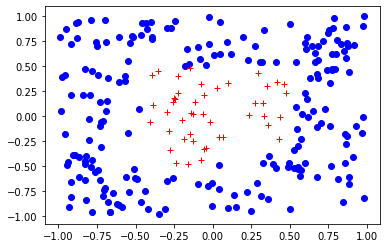

In [22]:
for pred_nr in range(0, X_test.shape[0]):
    
    x = X_test[pred_nr,0]
    y = X_test[pred_nr,1]
    
    if pred_nr < 10:        
        print("({0},{1}) --> is={2}, should={3}"
              .format(x,y, preds[pred_nr], Y_test[pred_nr]))
        
    pred_value = preds[pred_nr][0]
            
    if (pred_value > 0.5):
        plt.plot(x,y, 'r+')
    else:
        plt.plot(x,y, 'bo')
        
plt.show()    